# Data Cleaning and preprocessing Test Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
    
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_test= pd.read_csv('customer_test.csv')

df_test.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1681,1681,5939,1971,S1,Bertunangan,38232000.0,1,1,17-01-2014,...,5,0,0,0,0,0,0,3,11,0
1,1682,1682,2156,1955,S3,Menikah,22554000.0,1,1,03-11-2012,...,5,0,0,0,0,0,0,3,11,0
2,1683,1683,7788,1983,S3,Menikah,23536000.0,1,0,04-06-2014,...,3,0,0,0,0,0,0,3,11,0
3,1684,1684,10323,1952,S1,Menikah,49413000.0,0,1,25-10-2013,...,5,0,0,0,0,0,0,3,11,0
4,1685,1685,7947,1969,S1,Menikah,42231000.0,1,1,25-03-2014,...,5,0,0,0,0,0,0,3,11,0


In [3]:
print('Columns in Data:\n', df_test.columns)
print('Total rows and columns in Data:\n', df_test.shape)

Columns in Data:
 Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')
Total rows and columns in Data:
 (559, 31)


In [4]:
df_test.isnull().sum()

Unnamed: 0.1           0
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 7
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [5]:
# Handling missing values in the "Income" column by filling with the median
df_test["Income"].fillna(df_test["Income"].median(), inplace=True)

# Check if there are any remaining missing values
print(df_test.isnull().sum())

Unnamed: 0.1           0
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [6]:
# Remove unwanted columns from the dataset
df_test = df_test.drop(labels=['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Z_CostContact', 'Z_Revenue'], axis=1)

In [7]:
df_test.duplicated().sum()

9

In [8]:
df_test = df_test.loc[~df_test.duplicated()].reset_index(drop=True)

In [9]:
df_test.duplicated().sum()

0

# Data transformation: 

In [10]:
# renaming columns
df_test = df_test.rename(columns = {
    'Lajang': 'Single',
    'Bertunangan': 'Engaged',
    'Menikah': 'Married',
    'Cerai': 'Divorced',
    'Janda': 'Widowed(female)',
    'duda': 'Widowed (male)',
    'MntCoke': 'Coke',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweets',
    'MntGoldProds': 'Gold',
    'AcceptedCmp1': 'Campaign1',
    'AcceptedCmp2': 'Campaign2',
    'AcceptedCmp3': 'Campaign3',
    'AcceptedCmp4': 'Campaign4',
    'AcceptedCmp5': 'Campaign5',})

df_test.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Coke,Fruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Response
0,1971,S1,Bertunangan,38232000.0,1,1,17-01-2014,84,43000,5000,...,1,3,5,0,0,0,0,0,0,0
1,1955,S3,Menikah,22554000.0,1,1,03-11-2012,38,27000,0,...,0,4,5,0,0,0,0,0,0,0
2,1983,S3,Menikah,23536000.0,1,0,04-06-2014,53,6000,0,...,0,3,3,0,0,0,0,0,0,0
3,1952,S1,Menikah,49413000.0,0,1,25-10-2013,88,205000,7000,...,2,5,5,0,0,0,0,0,0,0
4,1969,S1,Menikah,42231000.0,1,1,25-03-2014,99,24000,0,...,0,3,5,0,0,0,0,0,0,0


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           550 non-null    int64  
 1   Education            550 non-null    object 
 2   Marital_Status       550 non-null    object 
 3   Income               550 non-null    float64
 4   Kidhome              550 non-null    int64  
 5   Teenhome             550 non-null    int64  
 6   Dt_Customer          550 non-null    object 
 7   Recency              550 non-null    int64  
 8   Coke                 550 non-null    int64  
 9   Fruits               550 non-null    int64  
 10  Meat                 550 non-null    int64  
 11  Fish                 550 non-null    int64  
 12  Sweets               550 non-null    int64  
 13  Gold                 550 non-null    int64  
 14  NumDealsPurchases    550 non-null    int64  
 15  NumWebPurchases      550 non-null    int

In [12]:
import datetime

# Convert 'Dt_Customer' to datetime format
df_test['Dt_Customer'] = pd.to_datetime(df_test['Dt_Customer'], format='%d-%m-%Y')

# Calculate customer tenure in months
df_test['Cst_tenure_months'] = ((pd.to_datetime('now') - df_test['Dt_Customer']) / pd.Timedelta(days=30)).astype('int64')

# Calculate customer age based on 'Year_Birth'
current_year = datetime.datetime.now().year

df_test['Age'] = current_year - df_test['Year_Birth']

In [13]:
# Group ages into decades
def group_age_into_decades(age):
    return (age // 10) * 10

# Apply the grouping function to create a new column "Age_Group"
df_test['Age_Group'] = df_test['Year_Birth'].apply(group_age_into_decades)

In [14]:
# Drop the 'Dt_Customer' column
df_test = df_test.drop(columns=['Dt_Customer'])

# Drop the 'Year_Birth' column
df_test = df_test.drop(columns=['Year_Birth'])

df_test.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Response,Cst_tenure_months,Age,Age_Group
0,S1,Bertunangan,38232000.0,1,1,84,43000,5000,28000,7000,...,0,0,0,0,0,0,0,118,52,1970
1,S3,Menikah,22554000.0,1,1,38,27000,0,10000,0,...,0,0,0,0,0,0,0,132,68,1950
2,S3,Menikah,23536000.0,1,0,53,6000,0,3000,0,...,0,0,0,0,0,0,0,113,40,1980
3,S1,Menikah,49413000.0,0,1,88,205000,7000,41000,3000,...,0,0,0,0,0,0,0,121,71,1950
4,S1,Menikah,42231000.0,1,1,99,24000,0,8000,0,...,0,0,0,0,0,0,0,116,54,1960


In [15]:
# Summary statistics.
df_test.describe()

,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,Sweets,Gold,...,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Response,Cst_tenure_months,Age,Age_Group
count,5.500000e+02,550.000000,550.000000,550.000000,5.500000e+02,550.000000,5.500000e+02,550.000000,550.000000,550.000000,...,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.00000,550.000000,550.000000,550.000000
mean,5.310677e+07,0.418182,0.523636,49.741818,3.020873e+05,27529.090909,1.712491e+05,39385.454545,27112.727273,46192.727273,...,0.074545,0.076364,0.085455,0.069091,0.018182,0.007273,0.16000,124.112727,54.290909,1964.200000
std,3.393562e+07,0.511824,0.528242,28.957205,3.318960e+05,40548.718916,2.313297e+05,56178.162525,40435.313673,54671.257486,...,0.262896,0.265821,0.279811,0.253840,0.133730,0.085047,0.36694,6.843423,11.863327,12.325134
min,4.023000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,112.000000,28.000000,1940.000000
25%,3.442700e+07,0.000000,0.000000,25.000000,2.300000e+04,2000.000000,1.500000e+04,3000.000000,2000.000000,9000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,118.000000,45.250000,1950.000000
50%,5.246300e+07,0.000000,1.000000,49.000000,1.755000e+05,8000.000000,6.650000e+04,12000.000000,8000.000000,25500.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,124.000000,53.000000,1970.000000
75%,6.945575e+07,1.000000,1.000000,74.750000,5.150000e+05,35750.000000,2.290000e+05,55000.000000,37750.000000,59000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,130.000000,64.000000,1970.000000
max,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,194000.000000,1.607000e+06,258000.000000,262000.000000,321000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,136.000000,83.000000,1990.000000


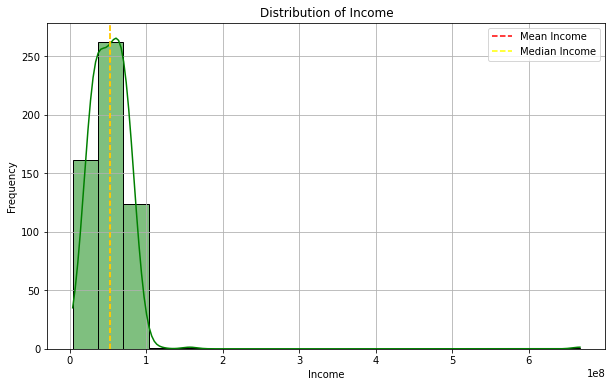

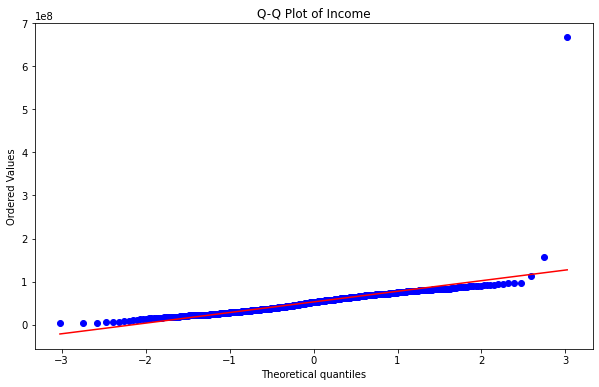

In [16]:
# Histogram and Q-Q plot for Income
import scipy.stats as stats

# Plot histogram of Income
plt.figure(figsize=(10, 6))

sns.histplot(df_test['Income'], kde=True, bins=20, color='green')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.grid(True)

# Add statistics to the plot
plt.axvline(x=np.mean(df_test['Income']), color='red', linestyle='--', label='Mean Income')
plt.axvline(x=np.median(df_test['Income']), color='yellow', linestyle='--', label='Median Income')
plt.legend()

# Create a probability plot (Q-Q plot) to check for normality
plt.figure(figsize=(10, 6))
stats.probplot(df_test['Income'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Income')
plt.show()

In [17]:
# Retaining the "Income" variable with the log transformation 
df_test['Log_Income'] = np.log1p(df_test['Income'])

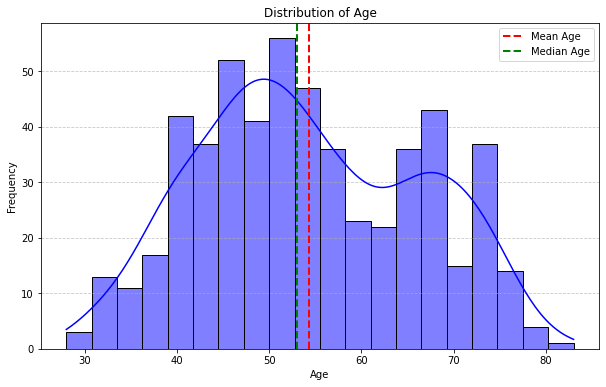

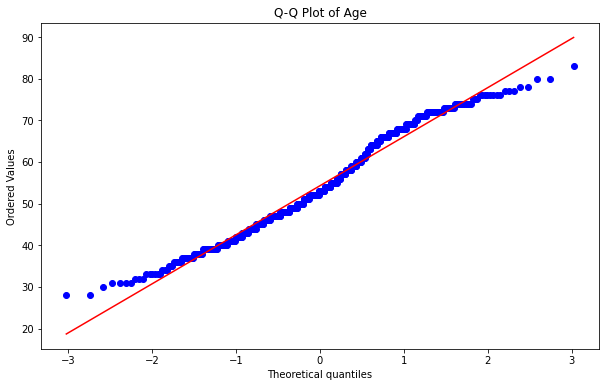

In [18]:
# Plot histogram of Age
plt.figure(figsize=(10, 6))

sns.histplot(data=df_test, x='Age', kde=True, color='blue', bins=20)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Customize grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add vertical lines for mean and median
mean_age = df_test['Age'].mean()
median_age = df_test['Age'].median()
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label='Mean Age')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label='Median Age')

# Add legend
plt.legend()

# Create a probability plot (Q-Q plot) to check for normality
plt.figure(figsize=(10, 6))

stats.probplot(df_test['Age'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Age')

plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder for 'Education' column
education_encoder = LabelEncoder()
df_test['Education'] = education_encoder.fit_transform(df_test['Education'])

# Create a label encoder for 'Marital_Status' column
marital_status_encoder = LabelEncoder()
df_test['Marital_Status'] = marital_status_encoder.fit_transform(df_test['Marital_Status'])

# Convert the encoded columns to int64 data type
df_test[['Education', 'Marital_Status']] = df_test[['Education', 'Marital_Status']].astype('int64')

In [20]:
df_test.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Coke', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Campaign3', 'Campaign4',
       'Campaign5', 'Campaign1', 'Campaign2', 'Complain', 'Response',
       'Cst_tenure_months', 'Age', 'Age_Group', 'Log_Income'],
      dtype='object')

In [21]:
df_test.shape

(550, 28)

In [22]:
df_test.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,Fish,...,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Response,Cst_tenure_months,Age,Age_Group,Log_Income
0,1,0,38232000.0,1,1,84,43000,5000,28000,7000,...,0,0,0,0,0,0,118,52,1970,17.459183
1,3,4,22554000.0,1,1,38,27000,0,10000,0,...,0,0,0,0,0,0,132,68,1950,16.931423
2,3,4,23536000.0,1,0,53,6000,0,3000,0,...,0,0,0,0,0,0,113,40,1980,16.974042
3,1,4,49413000.0,0,1,88,205000,7000,41000,3000,...,0,0,0,0,0,0,121,71,1950,17.715724
4,1,4,42231000.0,1,1,99,24000,0,8000,0,...,0,0,0,0,0,0,116,54,1960,17.558665


In [23]:
df_test.to_csv('preprocessed_test_data.csv', index=False)